# ------------- User's settings -------------

In [2]:
test_bags = ['CE47', 'CE49']
test_dates = ['00', '14', '42']

In [8]:
supervised_output_directory = '/RBC/models/supervised/Classification/'

In [19]:
weakly_output_directory = '/RBC/models/weaklysupervised/Regression/'

In [ ]:
# If using Conda, specifying the path for Python site-packages might be needed
import sys
# sys.path.insert(0, '/home/user/.conda/envs/env_names/lib/python3.6/site-packages')

# ------------- Executable -------------
Execute the rest of the script

In [1]:
%matplotlib inline
import peakutils
import glob
import os
import numpy
import math, decimal
import sklearn.metrics
import pandas
import seaborn
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# MI manual

In [3]:
# Human manual counts:

count_CE47_00 = {0: 3163, 1: 165, 2: 32, 3: 77, 4: 1, 5: 0, 6: 990}
count_CE47_14 = {0: 2723, 1: 244, 2: 62, 3: 92, 4: 4, 5: 0, 6: 1188}
count_CE47_42 = {0: 1337, 1: 679, 2: 271, 3: 496, 4: 4, 5: 20, 6: 1169}

count_CE48_00 = {0: 2520, 1: 495, 2: 21, 3: 68, 4: 6, 5: 1, 6: 1104}
count_CE48_14 = {0: 1913, 1: 597, 2: 78, 3: 146, 4: 2, 5: 3, 6: 1077}
count_CE48_42 = {0: 980, 1: 1165, 2: 276, 3: 297, 4: 5, 5: 11, 6: 1113}

count_CE49_00 = {0: 2016, 1: 429, 2: 79, 3: 76, 4: 0, 5: 3, 6: 1532}
# count_CE49_14 = {0: 1747, 1: 723, 2: 112, 3: 212, 4: 3, 5: 7, 6: 977}
count_CE49_14 = {0: 1747, 1: 0, 2: 835, 3: 212, 4: 3, 5: 7, 6: 977}
count_CE49_42 = {0: 348, 1: 881, 2: 609, 3: 1261, 4: 60, 5: 76, 6: 813}

In [4]:
manual_count = []

for bag in test_bags:
    for date in test_dates:
        mydict = globals()['count'+'_'+bag+'_'+date]
        manual_count.append(list(mydict.values()))

In [5]:
manual_ratio = []

for i in manual_count:
    manual_ratio.append([j/sum(i) for j in i])

In [6]:
mi_manual = []

for i in manual_ratio:
    mi = 1*i[0] + 0.8*i[1]+ 0.6*i[2]+ 0.4*i[3] + 0.2*i[4] + 0.01*i[5]
    mi_manual.append(mi)

In [7]:
mi_manual

[0.7554652213188798,
 0.6939485277069327,
 0.563933601609658,
 0.58936638452237,
 0.6171568368156573,
 0.47810276679841895]

# MI supervised

In [9]:
filenames = glob.glob(os.path.join(supervised_output_directory, '*CE*.npy'))

print(filenames)

In [11]:
all_cm = [ numpy.load(iii) for iii in filenames]

In [12]:
ratio = []

ordered_classes = {0:'Smooth Disc', 
                   1:'Crenated Disc', 
                   2:'Crenated Discoid', 
                   3:'Crenated Spheroid', 
                   4:'Crenated Sphere',
                   5:'Smooth Sphere',
                   6:'Side'}

for i,cm_aray in enumerate(all_cm):
    if i < 9:
        class_dict = {0:'Crenated Disc', 
                      1:'Crenated Discoid', 
                      2:'Crenated Sphere', 
                      3:'Crenated Spheroid', 
                      4:'Side', 
                      5:'Smooth Disc', 
                      6:'Smooth Sphere'}
        
    else:       
        class_dict = ordered_classes       
 
    cm = pandas.DataFrame(data = cm_aray, columns = list(class_dict.values()))

    cm = cm.rename(class_dict)      

    new_cm = cm[list(ordered_classes.values())]
    new_cm = new_cm.loc[list(ordered_classes.values())]

    ratio.append([i/numpy.sum(new_cm.iloc[1]) for i in new_cm.iloc[1]])        


In [13]:
mi_supervised = []
for i in ratio:
    mi = 1*i[0] + 0.8*i[1]+ 0.6*i[2]+ 0.4*i[3] + 0.2*i[4] + 0.01*i[5]
    mi_supervised.append(mi)

In [14]:
mi_supervised

[0.8514247279684325,
 0.8253357706369059,
 0.7352540059869695,
 0.8048536424071561,
 0.7478914131690413,
 0.6047450833020168]

# MI weakly supervised

In [15]:
def drange(x,y,jump):
    while x<y:
        yield float(x)
        x += decimal.Decimal(jump)

In [20]:
# Layer that governed the feature extraction
l = 'res4a_relu'

CE47
	 00
		 res4a_relu
			 umap_1D_from_res4a_relu_features_00_CE47.npy
Morph. index: [0.64429631]


CE47
	 14
		 res4a_relu
			 umap_1D_from_res4a_relu_features_14_CE47.npy
Morph. index: [0.61177602]


CE47
	 42
		 res4a_relu
			 umap_1D_from_res4a_relu_features_42_CE47.npy
Morph. index: [0.39236661]


CE49
	 00
		 res4a_relu
			 umap_1D_from_res4a_relu_features_00_CE49.npy
Morph. index: [0.66576172]


CE49
	 14
		 res4a_relu
			 umap_1D_from_res4a_relu_features_14_CE49.npy
Morph. index: [0.53608009]


CE49
	 42
		 res4a_relu
			 umap_1D_from_res4a_relu_features_42_CE49.npy
Morph. index: [0.18894317]




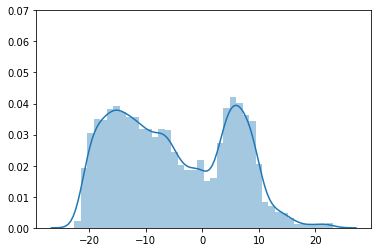

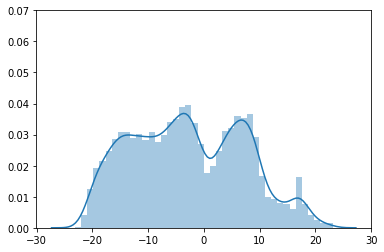

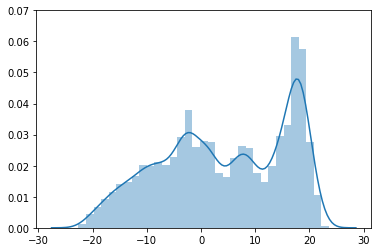

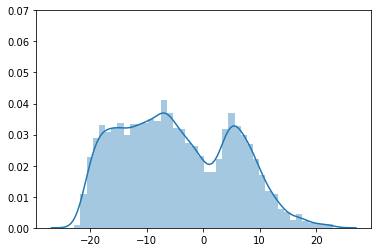

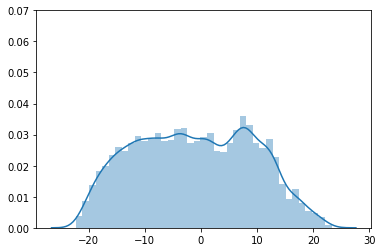

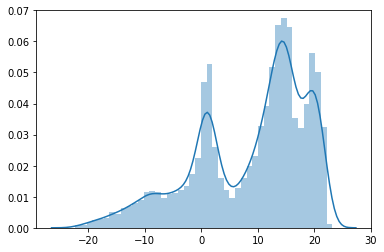

In [22]:
mi_weaklysupervised_Umap = []
for b in test_bags:
    this_bag_mi=[]
    for d in test_dates:
    
        input_directory = os.path.join(weakly_output_directory, b, d, l)

        print(b)
        print('\t',d)   
        print('\t'*2,l)

        file = os.path.join(weakly_output_directory, b, d, l, str('umap_1D_from_' + l +'_features_'+ d +'_'+ b + '.npy'))
        print('\t'*3,os.path.basename(file))

        embedding_1 = numpy.array( [kk for k in numpy.load(file) for kk in k] )
        plt.figure()
        seaborn.distplot(embedding_1)
        plt.ylim(0, 0.07)

        mi = sum(i < 0 for i in embedding_1)/embedding_1.shape
        
        this_bag_mi.append(mi)
        print('Morph. index:',  mi)
        print('\n')
    mi_weaklysupervised_Umap.append(this_bag_mi)

In [23]:
[j for i in mi_weaklysupervised_Umap for j in i]

[array([0.64429631]),
 array([0.61177602]),
 array([0.39236661]),
 array([0.66576172]),
 array([0.53608009]),
 array([0.18894317])]

# Plot

In [24]:
table = pandas.DataFrame()
table['mi_manual'] = mi_manual
table['mi_supervised'] = mi_supervised
table['mi_weaklysupervised_Umap'] = [j for i in mi_weaklysupervised_Umap for j in i]

# table['physiological'] = [-6.68, -5.23, -33.95] + [-3.04, -6.71, -25.19] + [-4.71, -7.94, -47.80]
table['physiological'] = [-6.68, -5.23, -33.95] + [-4.71, -7.94, -47.80]

# table['bag'] = ['CE47']*3 + ['CE48']*3 +['CE49']*3
table['bag'] = ['CE47']*3 + ['CE49']*3
table['date'] = [0,14,42]*2

In [25]:
table

,mi_manual,mi_supervised,mi_weaklysupervised_Umap,physiological,bag,date
0,0.755465,0.851425,[0.644296305153653],-6.68,CE47,0
1,0.693949,0.825336,[0.611776024629594],-5.23,CE47,14
2,0.563934,0.735254,[0.3923666138404649],-33.95,CE47,42
3,0.589366,0.804854,[0.6657617207893912],-4.71,CE49,0
4,0.617157,0.747891,[0.5360800924143242],-7.94,CE49,14
5,0.478103,0.604745,[0.18894317090483945],-47.80,CE49,42


In [27]:
scaled_table = sklearn.preprocessing.scale(numpy.array(table.iloc[:,:-2]))

/home/paul/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [28]:
table.iloc[:,:-2] = scaled_table

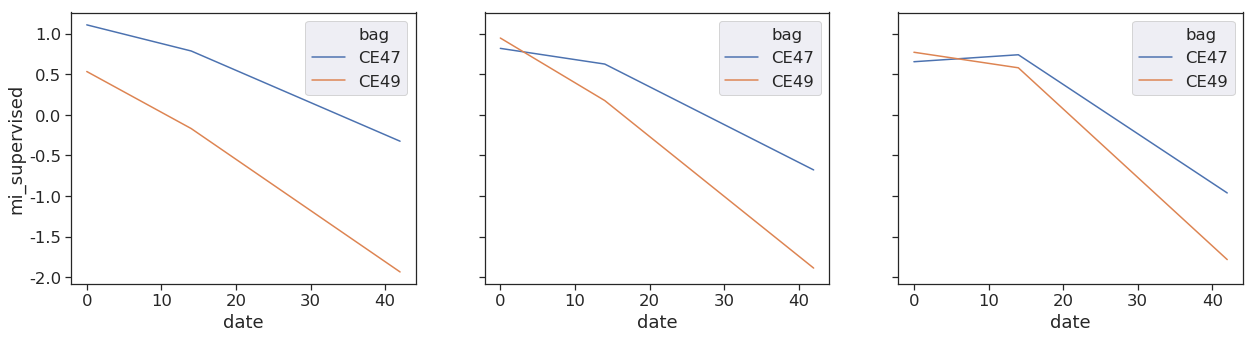

In [36]:
seaborn.set_style('ticks')
f, ax = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True)
f.set_size_inches(21, 5)
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Font size
seaborn.set(font_scale = 1.5)
# seaborn.lineplot(x='date', y='mi_manual', data=table, hue='bag', ax=ax[0])
seaborn.lineplot(x='date', y='mi_supervised', data=table, hue='bag', ax=ax[0])
seaborn.lineplot(x='date', y='mi_weaklysupervised_Umap', data=table, hue='bag', ax=ax[1])
seaborn.lineplot(x='date', y='physiological', data=table, hue='bag', ax=ax[2])

plt.savefig(os.path.join(weakly_output_directory, 'Compare_methods.png'), dpi = 300, tight_layout = True)

In [30]:
def slope_intercept(x_val, y_val):
    x=numpy.array(x_val)
    y=numpy.array(y_val)
    m=( (numpy.mean(x)*numpy.mean(y) - numpy.mean(x*y)) / (numpy.mean(x)*numpy.mean(x) - numpy.mean(x*x))
    )
    m=round(m,2)
    b=(numpy.mean(y) - numpy.mean(x)*m)
    b=round(b,2)
    
    return m,b

In [31]:
m,b=slope_intercept(table.mi_weaklysupervised_Umap, table.physiological)

In [32]:
reg_line=[(m*x)+b for x in table.mi_weaklysupervised_Umap]

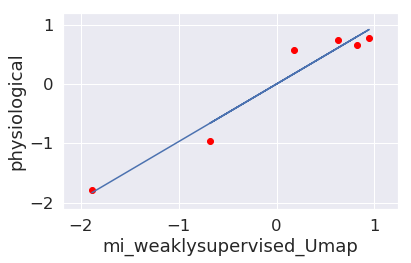

In [33]:
plt.scatter(table.mi_weaklysupervised_Umap, table.physiological, color='red')
plt.plot(table.mi_weaklysupervised_Umap, reg_line)
plt.xlabel('mi_weaklysupervised_Umap')
plt.ylabel('physiological')

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.2)

plt.savefig('Correlation_Physio_Umap_new.png', dpi = 300)

In [34]:
def rmse(y1, y_hat):
    y_actual=numpy.array(y1)
    y_pred=numpy.array(y_hat)
    error=(y_actual-y_pred)**2
    error_mean=numpy.mean(error)
    err_sq=numpy.sqrt(error_mean)
    return err_sq

In [35]:
rmse(table.physiological, reg_line)

0.23113301846357512

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(table.physiological, reg_line))
print(rms)